# Problem Statement:
The CarDekho company maintains a database of the cars sold through their platform. The data represents the cars sold by Car Dekho and the car related features. We have to build a linear regression model to predict the Selling price of the car. Calculate all the error metrics and diagnostic plots to check the regression result. The dataset contains data for around 301 cars sold by CarDekho.

# Data Description:
Car_Name: Name of the cars.

Year: Year of the car when it was bought.

Selling_Price: Price at which the car is being sold.

Present_Price: Current ex-showroom price of the car.

Kms_Driven: Distance completed by the car in km.

Fuel_Type: Fuel type of the car.

Seller_Type: Tells if a Seller is Individual or a Dealer.

Transmission: Gear transmission of the car (Automatic/Manual).

Owner: Number of previous owners of the car.

# Tasks/Activities List:

Your code should contain the following activities/Analysis:

Read the cars dataset.

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

Transform the categorical data.

Apply the Multiple Linear Regression model

Print the model results

Get the feature importance

Visualize the diagnostic plots

# Success Metrics:

Below are the metrics for the successful submission of this case study.

The R-squared of the trained model > 0.8

The Adjusted R-squared of the trained model > 0.8

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sweetviz as sv
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Reading the cars dataset.


In [2]:
car_data = pd.read_csv('car data.csv')

car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
print('shape of data:',car_data.shape)

shape of data: (301, 9)


### Data contains 301 rows × 9 columns

# 2. Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.duplicated().any()

True

In [7]:
car_data.drop_duplicates(inplace=True)

In [8]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### The mean and standard deviation is approximatly same for Selling_Price (output feature)

In [9]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
car_data['Vehicle_Age']=2024- car_data['Year']

#check out the newly added column
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [10]:
car_data.drop(['Year'],axis=1,inplace=True)

In [11]:
car_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## EDA for categorical columns

## Owner Type

In [12]:
car_data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [13]:
car_data['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

C:\Users\eunic\AppData\Local\Temp\ipykernel_2440\3455210434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner',y='Selling_Price',data=car_data,palette='muted')


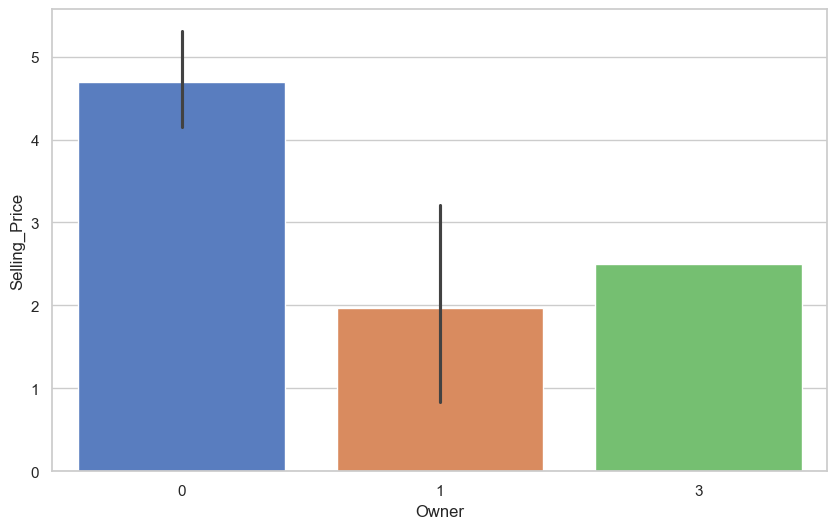

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Owner',y='Selling_Price',data=car_data,palette='muted')
plt.show()

### It seems that the vehicles belonging to no previous owner have the highest selling price

## Transmission Type

C:\Users\eunic\AppData\Local\Temp\ipykernel_2440\1102236454.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission',y='Selling_Price',data=car_data,palette='muted')


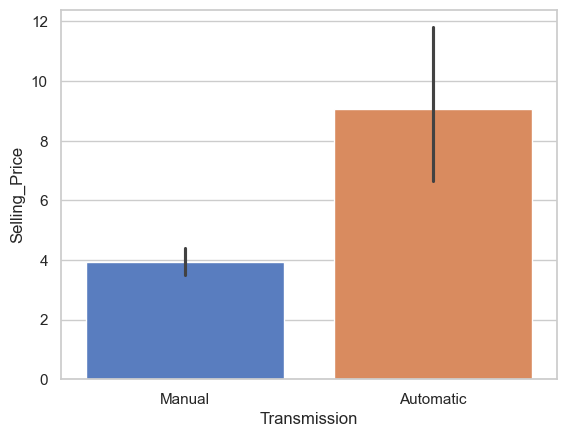

In [15]:
sns.barplot(x='Transmission',y='Selling_Price',data=car_data,palette='muted')
plt.show()

### We can see that automatic vehicles are found to have a large resale value in the market compared to manual transmission.

## Fuel Type

C:\Users\eunic\AppData\Local\Temp\ipykernel_2440\4045023486.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type',y='Selling_Price',data=car_data,palette='deep')


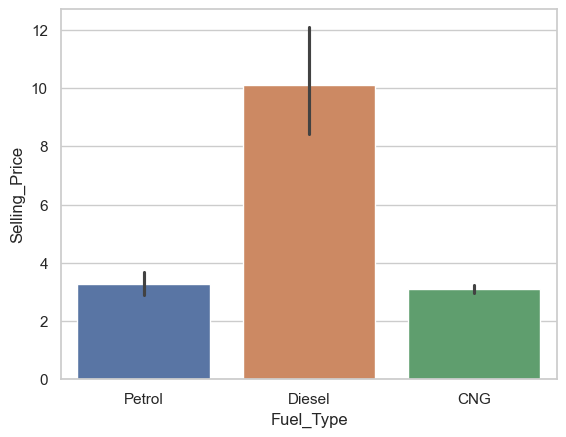

In [16]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car_data,palette='deep')
plt.show()

### Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles

## Seller Type

C:\Users\eunic\AppData\Local\Temp\ipykernel_2440\797637909.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seller_Type',y='Selling_Price',data=car_data,palette='deep')


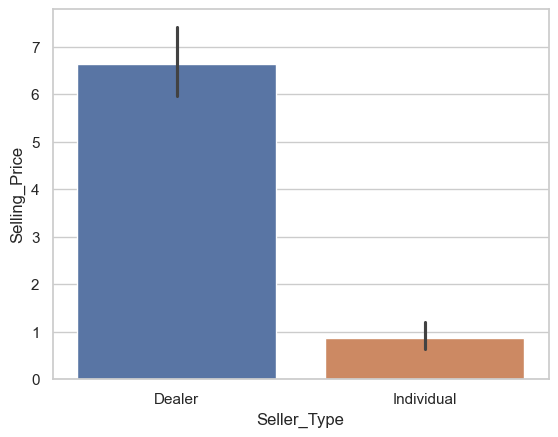

In [17]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=car_data,palette='deep')
plt.show()

### Dealers can sell vehicles at a higher selling price than a general individual.


In [18]:
# Import the necessary library
import ydata_profiling
from ydata_profiling import ProfileReport # type: ignore

# Assuming car_data is your DataFrame
# Generate the profile report
profile = ProfileReport(car_data, title="Car Data Profile Report", explorative=True)

# Display the report in a Jupyter notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Explanation:
ProfileReport(car_data, title="Car Data Profile Report", explorative=True): This creates a profile report for the DataFrame car_data. The title parameter sets the title of the report, and explorative=True enables an explorative mode with more detailed analysis.
profile.to_notebook_iframe(): This displays the profile report directly within the Jupyter notebook as an iframe.
By running this code, you should see an interactive profile report that provides a comprehensive analysis of your car_data DataFrame.

Selling Price vs Kms Driven : The selling price is found to be higher for vehicles with less kms covered.

Selling Price vs Present Price : Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.

Selling Price vs Vehicle age : It seems the selling price decreases overall for older vehicles.


# 3. Transforming the categorical data

In [19]:
# Separating the numerical and categorical columns
def data_type(car_data):
    numerical = []
    categorical = []
    for i in car_data.columns:
        if car_data[i].dtype == 'int64' or car_data[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(car_data)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(car_data)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(data, categorical):
    for i in categorical:
        car_data[i] = car_data[i].astype('category')
        car_data[i] = car_data[i].cat.codes
    return car_data

car_data = encoding(car_data, categorical)

In [20]:
car_data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,90,3.35,5.59,27000,2,0,1,0,10
1,93,4.75,9.54,43000,1,0,1,0,11
2,68,7.25,9.85,6900,2,0,1,0,7
3,96,2.85,4.15,5200,2,0,1,0,13
4,92,4.60,6.87,42450,1,0,1,0,10
...,...,...,...,...,...,...,...,...,...
296,69,9.50,11.60,33988,1,0,1,0,8
297,66,4.00,5.90,60000,2,0,1,0,9
298,69,3.35,11.00,87934,2,0,1,0,15
299,69,11.50,12.50,9000,1,0,1,0,7


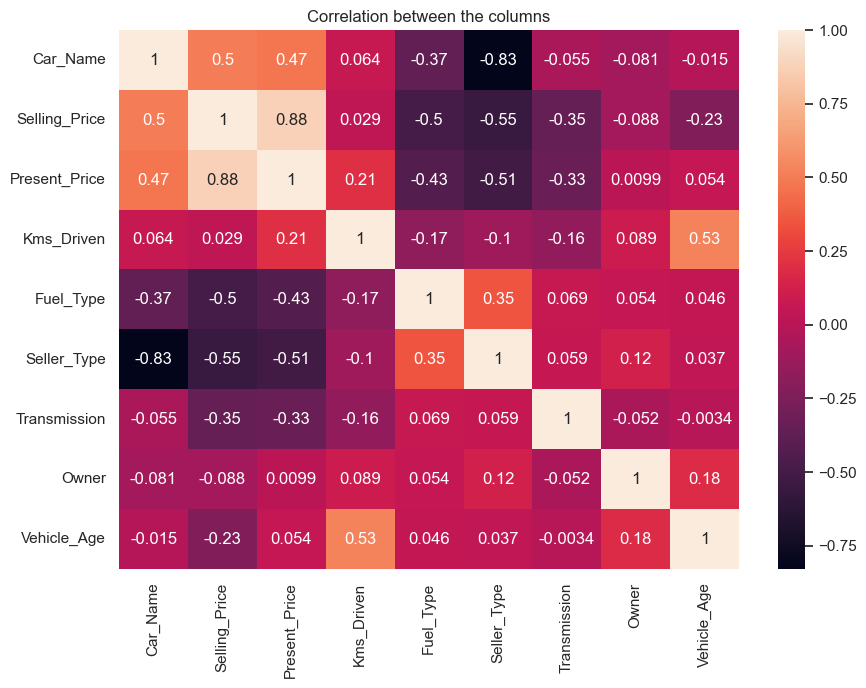

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

### We can observe selling price and present price has high correlation

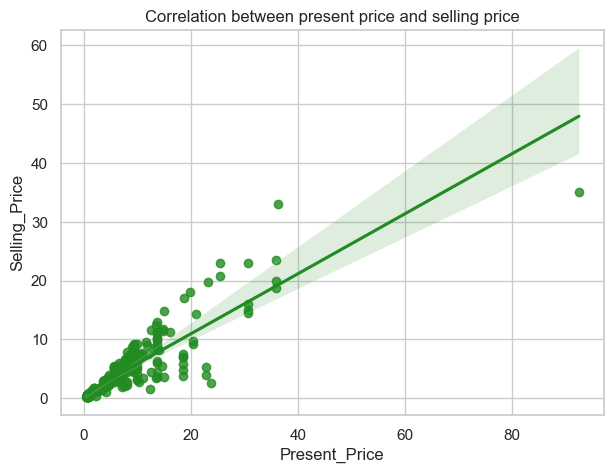

In [22]:
sns.set(style="whitegrid")
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data, color='forestgreen')
plt.show()

# 4. MLR Model

In [23]:
X = car_data.drop(['Car_Name','Selling_Price',], axis=1)
y = car_data['Selling_Price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (299, 7)
Shape of y is:  (299,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [25]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (90, 7)
X_train shape: (209, 7)
y_test shape:  (90,)
y_train shape: (209,)


In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# 5.Model Results

In [30]:
print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.9067731011137771
model score on testing data: 0.7674245157992122


In [31]:
print("R2 score_test: ", (metrics.r2_score(pred_test, y_test)))

print("R2 score_train: ", (metrics.r2_score(pred_train, y_train)))


R2 score_test:  0.688929917356859
R2 score_train:  0.8971882836271681


In [32]:
# print the intercept of best-fit line
print(model.intercept_)

4.608277511961723


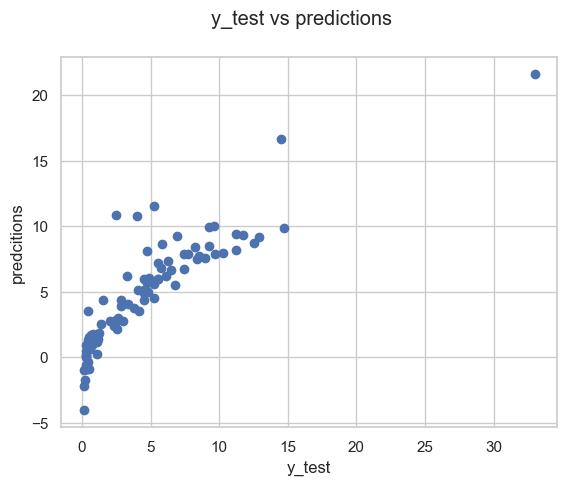

In [33]:
predictions_test=model.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions_test)
plt.show()

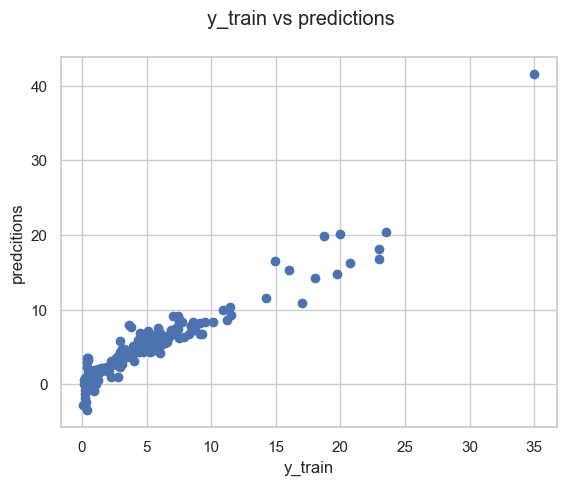

In [34]:
predictions_train=model.predict(X_train)


fig = plt.figure()
# Plot-label
fig.suptitle('y_train vs predictions')

#X-label
plt.xlabel('y_train')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_train,predictions_train)
plt.show()

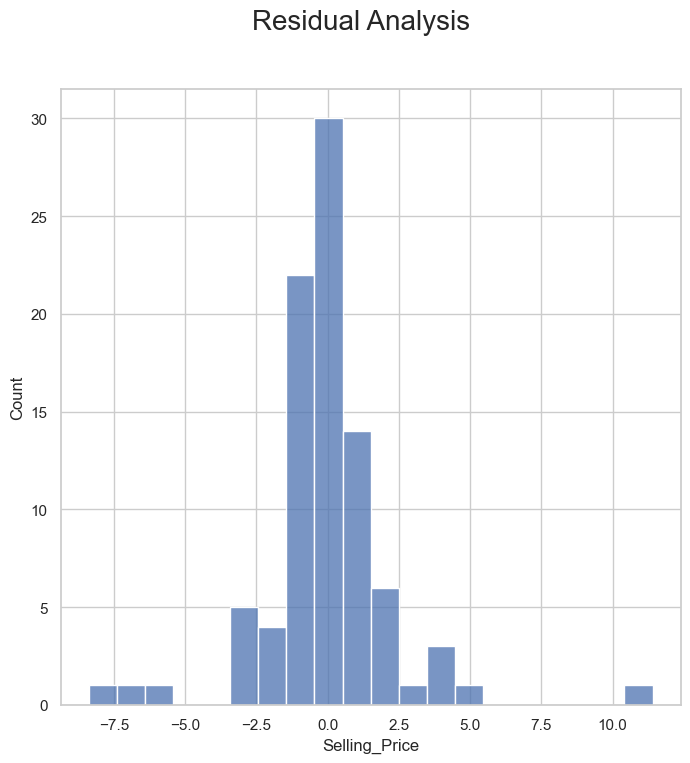

In [35]:

fig=plt.figure(figsize=(8,8))
  
sns.histplot((y_test-predictions_test),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)
plt.show()

# 6. Feature Importance

In [36]:
temp=car_data.drop(columns=['Car_Name','Selling_Price'])

coeff_df = pd.DataFrame(model.coef_,temp.columns,columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient',ascending=False)

,Coefficient
Present_Price,3.970087
Owner,0.130405
Kms_Driven,-0.259915
Fuel_Type,-0.443575
Transmission,-0.611942
Seller_Type,-0.630315
Vehicle_Age,-0.984115


In [37]:
from pandas import plotting

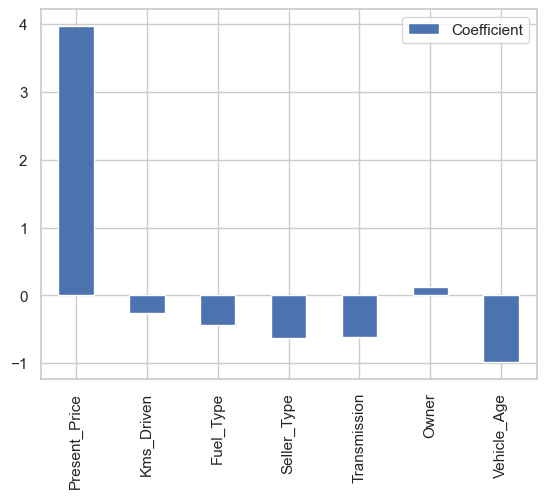

In [38]:
coeff_df.plot(kind='bar')
plt.show()
sns.set(style="whitegrid")

#### The feature 'Present_Price' has highest weight in defining output

# 7.Visualize diognostic plot

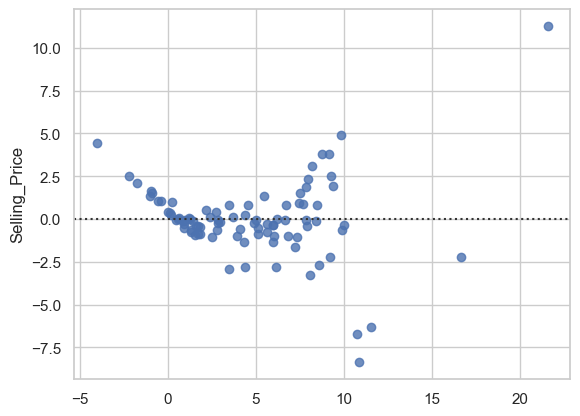

In [39]:
sns.residplot(y=y_test,x=predictions_test)
plt.show()

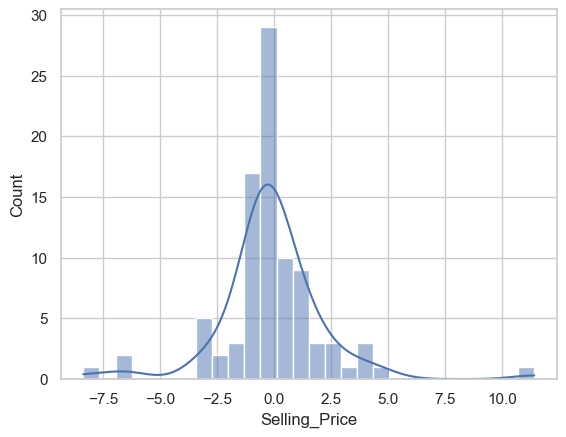

In [40]:
pd.option_context('mode.use_inf_as_na', True)
sns.histplot(y_test-pred_test,kde=True)
plt.show()
sns.set(style="whitegrid")

In [41]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [42]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 
    sns.set(style="whitegrid")

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


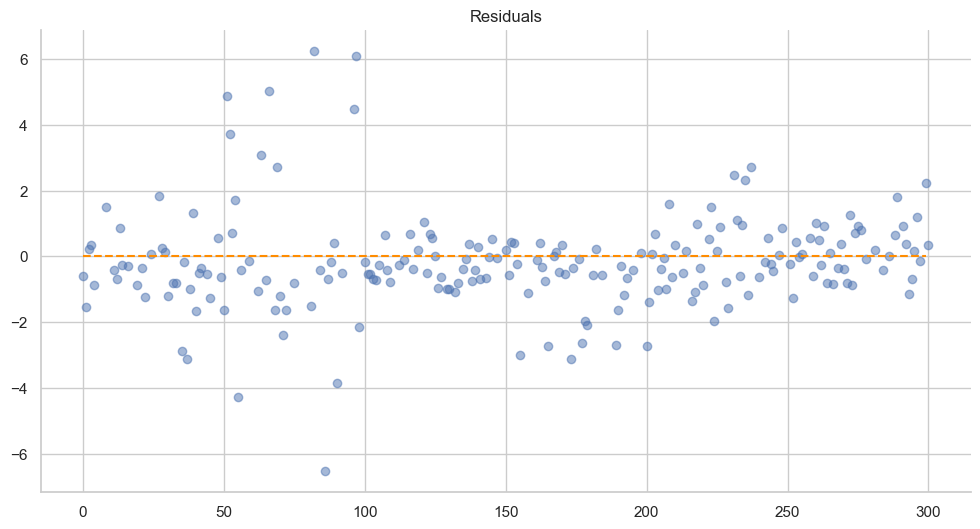

In [43]:
homoscedasticity_assumption(model, X_train, y_train)

In [44]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    sns.set(style="whitegrid")

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


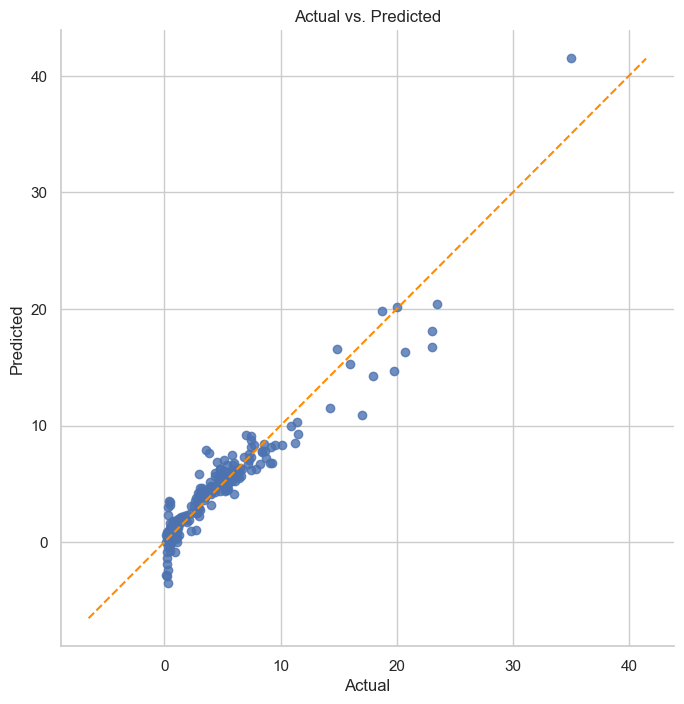

In [45]:
linear_assumption(model, X_train, y_train)

In [46]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    sns.set(style="whitegrid")
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.0970009499411978e-15
Residuals are not normally distributed


C:\Users\eunic\AppData\Local\Temp\ipykernel_2440\957852353.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


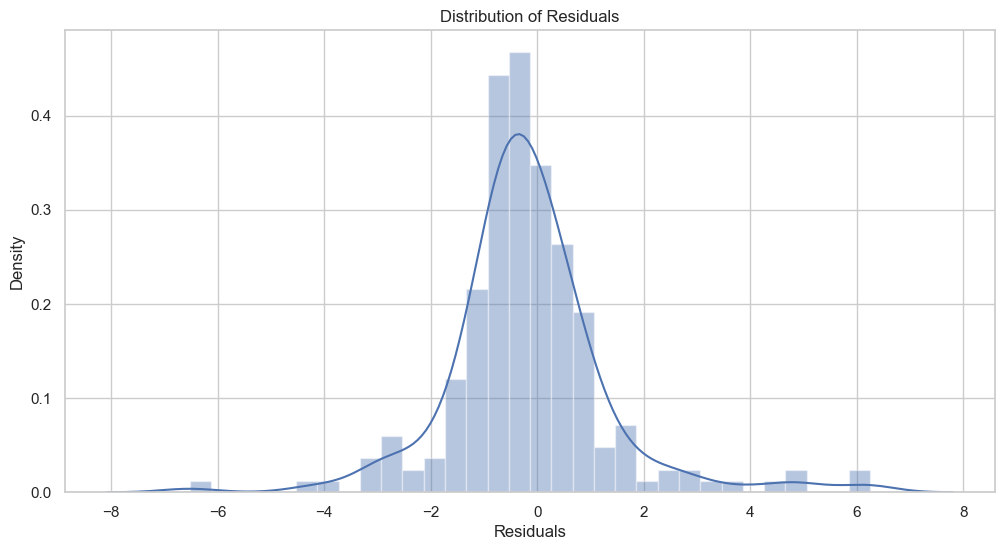


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [47]:
normal_errors_assumption(model, X_train, y_train)

In [48]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


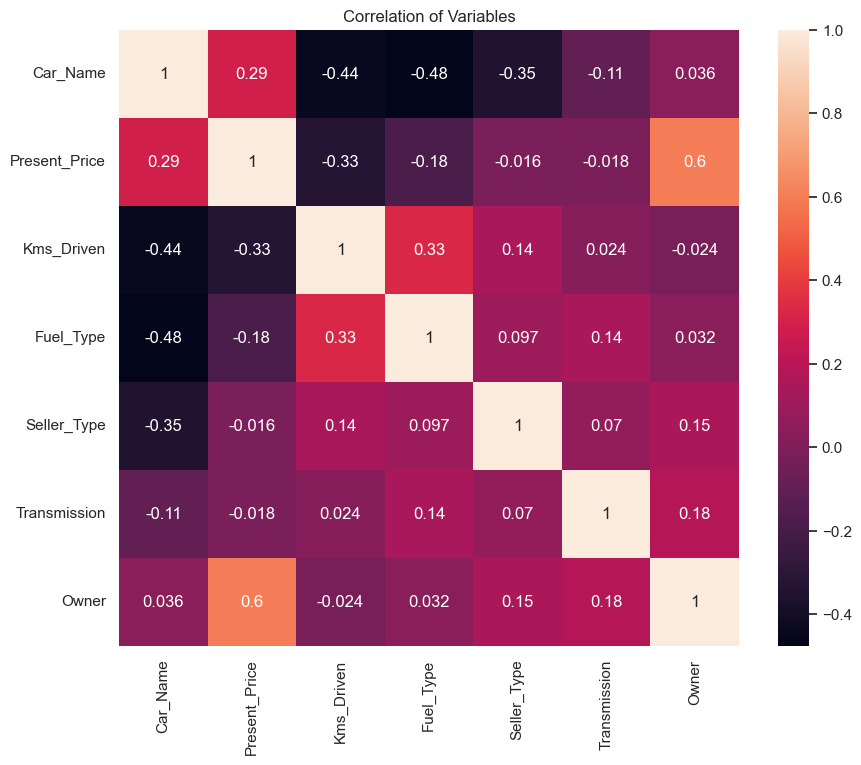

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Car_Name: 1.6902497645549845
Present_Price: 1.9742170608601768
Kms_Driven: 1.3899028738653223
Fuel_Type: 1.3585044860486868
Seller_Type: 1.1808963280131788
Transmission: 1.0765689095190663
Owner: 1.8132397953060537

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [49]:
multicollinearity_assumption(model, X_train, y_train, car_data.iloc[:,[0,2,3,4,5,6,7]].columns.values)

# Conclusions
Present price of a car directly influences Selling Price prediction. Both are highly correlated and here directly proportional to each other.

Resale value of Automatic vehicle is more than that of a Manual vehicle.

Car age is effecting negatively as the Selling Price decreases for an older car.

Resale value of cars with Fuel type Diesel is higher.